### Resumo livro - Approaching (almost) any Machine Learning Problem


## Cross-Validation

Antes de começar a modelar qualquer algoritmo de machine learning, devemos saber o que é cross-validation e qual tipo devemos utilizar de acordo com seus dados e seus problemas de negócio.

## Definição:

De acordo com o autor, **cross-validation** é o step no processo de modelagem de um algorítmo de machine learning que nos ajuda a garantir que nosso modelo define com acurácia os dados e também nos garante a não ter **overfitit**.

### Overfitting:



Para explicar overfitting, vamos dar uma analisada no **red wine-quality dataset**



> ### O dataset:

[Clique aqui para download dos dados](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

- 11 atributos que definem a qualidade do vinho:
   - 1 - fixed acidity
   - 2 - volatile acidity
   - 3 - citric acid
   - 4 - residual sugar
   - 5 - chlorides
   - 6 - free sulfur dioxide
   - 7 - total sulfur dioxide
   - 8 - density
   - 9 - pH
   - 10 - sulphates
   - 11 - alcohol
- A variável target, ou seja, que queremos prever :
    - 12 - quality (score entre 0 e 10)

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import pandas as pd
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Como a qualidade do vinho é um valor que varia de 0 a 10, podemos tratar esse problema como uma regressão ou classificação. No caso de classificação ( que é o que iremos fazer por simplicidade), teremos 10 classes porém podemos condensa-las em 5.

Apesar das 10 classes, podemos notar que o dataset só apresenta as classes a seguir:

In [20]:
# valores unicos para qualidade
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [22]:
qualidade_map = {
                    3 : 0,
                    4 : 1,
                    5 : 2,
                    6 : 3,
                    7 : 4,
                    8 : 5,
                }


In [25]:
df.loc[:, 'quality'] = df.quality.map(qualidade_map)

In [26]:
df.quality.unique()

array([2, 3, 4, 1, 5, 0], dtype=int64)

Vamos dividir o dataset em duas partes. Podemos ver abaixo que nosso dataframe possui 1599 linhas e 12 colunas. Vamos separar 1000 para treino e 599 para teste e modelar uma decision tree simples.

In [28]:
# Número de linhas e colunas do dataframe
df.shape

(1599, 12)

#### Separar os dados em treino e teste

In [39]:
# frac = 1 para embaralhar o dataframe
# reset_index para resetar os indeces
df = df.sample(frac = 1).reset_index(drop=True)

# dataset de treinamento
df_treino = df.head(1000)

# dataset de teste/validação
df_teste = df.tail(599)

#### Treinando uma Decision Tree

Agora que já separamos os datasets, podemos treinar da decision tree com os dados de treino. Vamos selecionar o max_depth = 3 e os demais parametros como valor default. Iremos também selecionar algumas colunas para usar como feature do modelo.

In [40]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### max_depth = 3

In [41]:
# Importando decision tree e metrics do scikit learn
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth = 3)

# Separando algumas colunas para treinar o dataset
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# treinando o modelo
clf.fit(df_treino[cols], df_treino['quality'])

DecisionTreeClassifier(max_depth=3)

#### Testando acurácia do modelo 

In [43]:
# Realizar previsão com os dados de treino
previsao_treino = clf.predict(df_treino[cols])

# Realizar previsão com os dados de teste
previsao_teste = clf.predict(df_teste[cols])

# Calculando acurácia nos dados de treino
acuracia_treino = metrics.accuracy_score(df_treino['quality'], previsao_treino)
print('Acurácia no treinamento: {}'.format(acuracia_treino))

# Calculando acurácia nos dados de teste
acuracia_teste = metrics.accuracy_score(df_teste['quality'], previsao_teste)
print('Acurácia no teste: {}'.format(acuracia_teste))


Acurácia no treinamento: 0.625
Acurácia no teste: 0.5609348914858097


Como mostrado no código acima, a acurácia com os dados de treino é de 62,5% e com os dados de teste é de cerca de 56,1%. Vamos então aumentrar a profundidade das árvores, dando uma maior complexidade ao modelo e repetir o processo.

#### max_depth = 7

O cídogo abaixo mostra o resultado do treinamento do modelo com max_depth = 7. Podemos notar que a acurácia com dados de treino é de cerca de 74%  e com dados de teste é de 59%. 

In [44]:
# Importando decision tree e metrics do scikit learn
from sklearn import tree
from sklearn import metrics

clf = tree.DecisionTreeClassifier(max_depth = 7)

# Separando algumas colunas para treinar o dataset
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# treinando o modelo
clf.fit(df_treino[cols], df_treino['quality'])

# Realizar previsão com os dados de treino
previsao_treino = clf.predict(df_treino[cols])

# Realizar previsão com os dados de teste
previsao_teste = clf.predict(df_teste[cols])

# Calculando acurácia nos dados de treino
acuracia_treino = metrics.accuracy_score(df_treino['quality'], previsao_treino)
print('Acurácia no treinamento com max_depth = 7 : {}'.format(acuracia_treino))

# Calculando acurácia nos dados de teste
acuracia_teste = metrics.accuracy_score(df_teste['quality'], previsao_teste)
print('Acurácia no teste com max_depth = 7: {}'.format(acuracia_teste))


Acurácia no treinamento com max_depth = 7 : 0.746
Acurácia no teste com max_depth = 7: 0.5959933222036727


Note que estamos usando acurácia por ser a métrica com maior simplicidade de análise, porém essa pode não ser a melhor métrica para resolver esse problema.Dito isso, vamos calcular as acurácias para diferentes valores de max_depth e fazer um plot para ver o comportamento do nosso modelo.

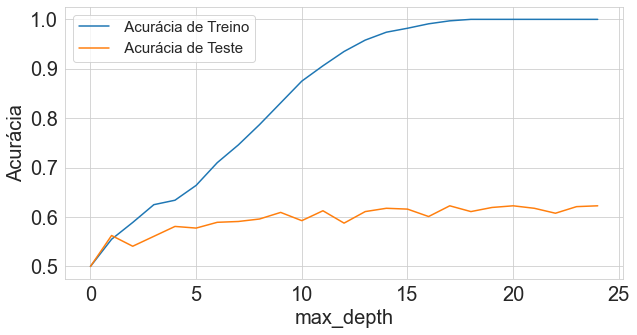

In [50]:
from sklearn import tree, metrics

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Definir tamanho do label do nosso plot
matplotlib.rc('xtick' , labelsize = 20)
matplotlib.rc('ytick', labelsize = 20)

# Mostrar o gráfico no notebook
%matplotlib inline

# Iniciar listas de acurácia de treino e teste - começando com 50%
acuracias_treino = [0.5]
acuracias_teste = [0.5]

# coluna com as features
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

# loop para diferentes valores de profundidade
for depth in range(1,25):
    # iniciando o modelo
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    
    #fit no modelo
    clf.fit(df_treino[cols], df_treino['quality'])
    
    # Criar previsão de treino e teste
    previsao_treino = clf.predict(df_treino[cols])
    previsao_teste = clf.predict(df_teste[cols])
    
    # Calcular acurácia de treino e teste
    acuracia_treino = metrics.accuracy_score(df_treino['quality'], previsao_treino)
    acuracia_teste = metrics.accuracy_score(df_teste['quality'], previsao_teste)
    
    # Adicionar acurácia calculada na nossa lista de acurácia
    acuracias_treino.append(acuracia_treino)
    acuracias_teste.append(acuracia_teste)


# Criar o plot com matplotlib e seaborn
plt.figure(figsize = (10,5))
sns.set_style('whitegrid')
plt.plot(acuracias_treino, label = ' Acurácia de Treino')
plt.plot(acuracias_teste, label = ' Acurácia de Teste')

plt.legend(loc = 'upper left', prop ={'size': 15})
plt.xticks(range(0,26,5))
plt.xlabel('max_depth', size = 20) 
plt.ylabel('Acurácia', size = 20)
plt.show()

O plot acima nos mostra que nosso modelo aprende cada vez melhor os dados de treinamento com um maior valor de max_depth até chegar ao valor que o mesmo possui 100% de acurácia. Já os valores de acurácia para o teste, apresentam o maior valor quando o max_depth igual a 14 ( desconsiderando o valor após acurácia ser 100% nos dados de treino). Isso mostra que apesar da melhora da performance do modelo com os dados de treino, quando vamos analisar o desempenho do mesmo modelo com dados desconhecido, esse modelo encontra-se com *overfitting*. Ou seja, ele aprende muito os padrões dos dados de treino porém não consegue generalizar bem quando é testado ou avaliado em dados que não viu antes.

- Modelo aprende bem os padrões dos dados de treino
- Performance limitada com dados novos (teste ou validação)
- Podemos dizer que modelo apresenta grande bias, pois memorizou o comportamento dos dados de treino
- Modelo possui dificuldade de generalizar
- Grande performance no treino e performance fraca no teste/validação
- Devemos usar técnicas e estratégias para evitar overffiting
    - Controlar a profundidade das árvores
    - Cross-validation
    - Controlar a complexidade do modelo de acordo com as escolhas dos parâmetros 
    - etc...
    

Importante notar que algumas pessoas podem não considerar esse caso como overfitting pelo simples fato da acurácia nos dados de teste permanecer mais ou menos a mesma. Para eses, o overfitting ocorre quando a performance de teste cai quando a perfoamnce de treino melhora.

No que diz respeito a deep learning, devemos monitorar a loss durante a fase de treinamento tanto para os dados de treinoq quanto para os dados de teste. Se tivermos uma grande complexidade no modelo, ou grande profundidade, com dados relativamente pequenos, iremos observar que o valor de loss para os dois datasets (treino e teste) irão crescer ao longo do treinamento. Porém, em algum momento ou ponto, o valor de loss para os dados de teste irá atingir seu valor mínimo e , apartir desse momento, irá começar a crescer apesar dos valores para os dados de treinamento continuem diminuindo. É nesse momento em que devemos para o treinamento para garantir que o modelo não tenha *overfitting.*

O gráfico de complexidade do modelo abaixo nos mostra o comportamento do modelo quando vamos aumentando sua complexidade. **Underfitting** é quando o modelo não consegue desempenhar bem tanto com os dados de treino quanto com os dados de teste ( Erro grande). A região circulada mostra o momento em que o teste error atinge seu máximo e a partir desse ponto, o desempenho do modelo começar a cair e o erro a crescer - dando início a fase de overfitting da modelage. 

<img src = 'complexity_curve.png'  />

# Cross-Validation

Agora podemos falar de fato de cross-validation.

No exemplo anterior, nós dividimos os dados em treino e test/validação. Treinamos o modelo com a primeira parte e avaliamos o modelo na segunda. Esse é um tipo de cross-validation e é conhecido como **hold-out set**.
- Usamos o **hold-out set** quando temos muitos dados e o a inferencia do modelo é um processo demorado.

Existem diferentes maneiras de fazer *cross-validation*. Essa é uma etapada crucial para construção de algoritmos de machine learning que generalizam quando aplicados em dados novos. Escolher a melhor Cross-Validation depende do dataset em questão.

Abaixo, as Cross-validation mais comumns:
- K-fold cross-validation
- stratified k-fold cross-validation
- Hout-out based validation
- Leave-one-out cross-validation
- group k-fold cross-validation

Cross-validation é basicamente dividir o dataset em algumas partes. Nós então treinamos o modelo em algumas dessas partes e o testamo nas partes restantes.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

## K-fold cross-validatio

Os dados são separados em **k** diferentes sets que são exclusivos entre si. Na figura abaixo dividimos o dataset em 5 partes iguais. Separamos então uma parte desses 5 para teste e o restante para treinar o modelo. Avaliamos o modelo então nos dados de teste (acurácia, por exemplo). Na segunda parte, separamos para teste a mesma quantidade de dados, porém uma outra porção - diferente da que foi usado para teste na primeira iteração. Treinamos o modelo nos dados de treino e o avaliamos com os novos dados de teste. Realizamos isso durante 5 iterções e em seguida fazemos a média da métrica usada nas avaliações.

Note que devemos realizar uma randomização desses dados. Caso contrário, podemos separar para teste dados de mesma classe ou similares entre sí porém com significante diferença dos dados de treino. Gerar essa aleatoriedade é importante para termos generalização.

Note ainda que, podemos avaliar a média de cada iteração mas também podemos simplesmente analisar o menor e o maior valor. A escolha vai depender da métrica que irá fazer mais sentido para o seu problema de negócio.

<img src = 'k-fold.png'  />

Podemos separar os dados em k partes iguais através do **KFold** do scikit-learn. Cada amostra recebe um valor de 0 a k-1.

In [16]:
import pandas as pd
from sklearn.model_selection import KFold

df = pd.read_csv('winequality-red.csv')

qualidade_map = {
                    3 : 0,
                    4 : 1,
                    5 : 2,
                    6 : 3,
                    7 : 4,
                    8 : 5,
                }

df.loc[:, 'quality'] = df.quality.map(qualidade_map)

# Criar uma nova coluna chamada kfold e preencher com -1
df['kfold'] = -1 

# Randomizar as linhas do dos dados
df = df.sample(frac=1).reset_index(drop = True)

# Inicializar a classe kfold do modulo model_selecion
kf = KFold(n_splits = 5)

# Preencher a coluna kfold
for fold, (treino, val) in enumerate(kf.split(X=df)):
    df.loc[val, 'kfold'] = fold
    
df.to_csv('winequality-red_kfolds.csv', index = False)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.1,0.60,0.00,1.8,0.074,16.0,34.0,0.99720,3.47,0.70,9.9,3,0
1,6.1,0.60,0.08,1.8,0.071,14.0,45.0,0.99336,3.38,0.54,11.0,2,0
2,6.2,0.70,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,3,0
3,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,1,0
4,7.2,0.37,0.32,2.0,0.062,15.0,28.0,0.99470,3.23,0.73,11.3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.7,0.48,0.02,2.2,0.080,36.0,111.0,0.99524,3.10,0.53,9.7,2,4
1595,9.1,0.34,0.42,1.8,0.058,9.0,18.0,0.99392,3.18,0.55,11.4,2,4
1596,7.2,0.34,0.21,2.5,0.075,41.0,68.0,0.99586,3.37,0.54,10.1,3,4
1597,7.1,0.43,0.42,5.5,0.071,28.0,128.0,0.99730,3.42,0.71,10.5,2,4


In [8]:
df.kfold.unique()

array([0, 1, 2, 3, 4], dtype=int64)

- Kfold pode ser usado em praticamente todos os tipos de dados


---

## Stratified k-fold Cross-validation

Imagine que vc tenha dados desbalanceados para uma terefa de  classificação binária. Imagine ainda que 90% desses dados sao classe 1 e 10% classe 0. Nesse contexto, você provavelmente não irá utilizar k-fold cross-validation randomizada (como vimos acima). Se usarmos a o k-fold padrão, podemos gerar folds com todos dados da classe 0. Evitamos esse problema utilizando o **Stratified k-fold cross-validation**.

**Stratified k-fold cross-validation** faz com que a proporção das classes seja mantida para cada fold. Considerando o caso acima, se os nossos dados possuem 90% com label positivo e 10% com label negativo, essa proporção será mantida em cada fold após a divisão dos dados. Se dividirmos os dados em 5 folds, para cada um dos 5, teremos 90% dos dados da classe 1 e 10% da classe 0. Então para qualquer métrica que for utilizada para avaliação, será gerado resultdos similares para todos os folds.

- Para aplicar o **Stratified k-fold cross-validation**, devemos apenas substituir o *KFold()* por *StratifiedKFold()* no código que usamos no winequality dataset.

In [15]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

df = pd.read_csv('winequality-red.csv')

qualidade_map = {
                    3 : 0,
                    4 : 1,
                    5 : 2,
                    6 : 3,
                    7 : 4,
                    8 : 5,
                }
df.loc[:, 'quality'] = df.quality.map(qualidade_map)

# Criar uma nova coluna chamada kfold e preencher com -1
df['kfold'] = -1 

# Randomizar as linhas do dos dados
df = df.sample(frac=1).reset_index(drop = True)

#Pegando a coluna quality
y = df['quality'].values

# Inicializar a classe kfold do modulo model_selecion
strat_kf = StratifiedKFold(n_splits = 5)

# Preencher a coluna kfold
for fold, (treino, val) in enumerate(strat_kf.split(X=df, y=y )):
    df.loc[val, 'kfold'] = fold
    
df.to_csv('winequality-red_strat_kfold.csv', index = False)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.0,0.560,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,4,0
1,6.9,0.520,0.25,2.6,0.081,10.0,37.0,0.99685,3.46,0.50,11.00,2,0
2,10.5,0.240,0.42,1.8,0.077,6.0,22.0,0.99760,3.21,1.05,10.80,4,0
3,8.7,0.480,0.30,2.8,0.066,10.0,28.0,0.99640,3.33,0.67,11.20,4,0
4,9.5,0.460,0.24,2.7,0.092,14.0,44.0,0.99800,3.12,0.74,10.00,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,11.3,0.370,0.41,2.3,0.088,6.0,16.0,0.99880,3.09,0.80,9.30,2,4
1595,5.4,0.420,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.30,4,4
1596,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.20,2,4
1597,9.0,0.820,0.05,2.4,0.081,26.0,96.0,0.99814,3.36,0.53,10.00,2,4


> #### Vamos verificar a bistribuição das classes do winequality dataset.


O gráfico de barras abaixo mostra a distribuição das classes no winequality dataset. Podemos ver a que existem muito mais dados das classes 2 e 3 quando comparada com as demais. Nesse caso, se usarmos o k-fold cross-validation não teremos uma distribuição dessa forma em cada fold. **Por isso nós devemos usar o stratified k-fold cross-validation.**

Text(0, 0.5, 'count')

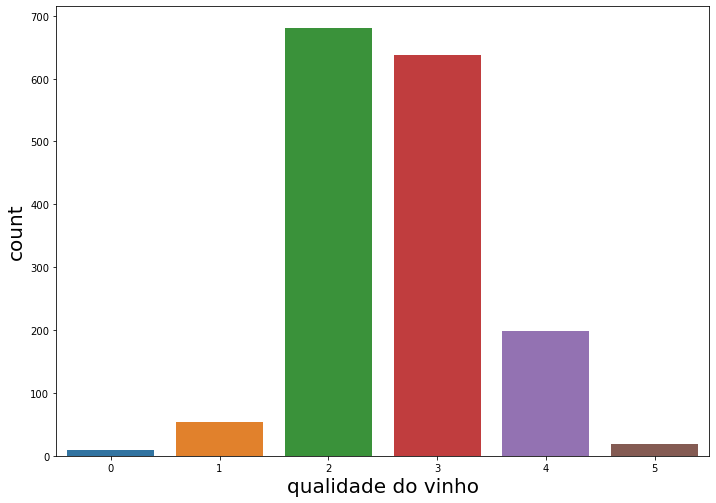

In [27]:

import seaborn as sns
import matplotlib.pyplot as plt
dimensao = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dimensao)
bar = sns.countplot(x = 'quality', data = df)
bar.set_xlabel('qualidade do vinho', fontsize = 20)
bar.set_ylabel('count', fontsize = 20)

> #### Analisando distribuição das classes para o fold = 4

Se filtrarmos somente os dados que foram para o fold = 4, veremos que eles possuem a mesma proporção na distribuição das classes. Imagem abaixo

Text(0, 0.5, 'count')

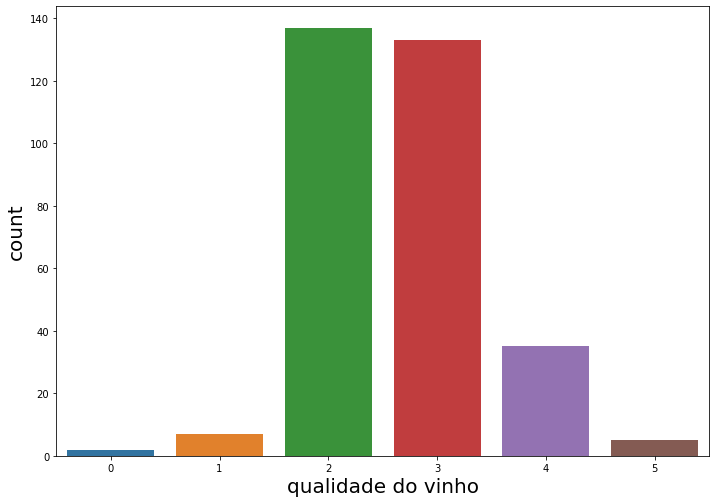

In [31]:
fold_4 = df.loc[df.kfold == 4, :]

import seaborn as sns
import matplotlib.pyplot as plt
dimensao = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dimensao)
bar = sns.countplot(x = 'quality', data = fold_4)
bar.set_xlabel('qualidade do vinho', fontsize = 20)
bar.set_ylabel('count', fontsize = 20)

### Conclusão:
- Stratified kfold cross-validation faz com que cada fold tenha proporção na distribuição de classes similar ao dataset completo
- Se for trabalhar com um problema de classificação padrão, escolha stratified kfold cross-validation

---

## Hold-out based Validation

O que devemos fazer se tivermos um dataset muito grande ?! Vamos supor que tenhamos um dataset com 1 milhão de dados. Aplicar k-fold cross-validation resultaria em 800k dados de treino e 200k para validação. Dependendo de qual algoritmo for escolhido para a modelagem, o processo de treino e validação pode ser muito caro. Nesses casos nós podemos utilizar o **hold-out based validation**

O processo de criação do hold-out é o mesmo do stratified k-fold. Para o caso do dataset com 1 milhão de dados, podemos criar 10 folds ao invés de 5, e deixar 1 desses folds separados (hold-out). Isso significa que teremos 100k dados nesse fold que vamos chamar de hold-out. Sempre iremos calcular loss, acurácia ou qualquer outra métrica nesses dados que foram separados e treinar com os outros 900k remanescentes.

**Hold-out** é frequentemente usado em *time series*. Vamos supor que foi nos designado a tarefa de prever as vendas de uma determinada loja para o ano de 2020 e recebemos dados de 2015 - 2019. Nesse caso, nós podemos separar os dados de 2019 como o **hold-out** e treinar o modelo com os outros dados dos anos de 2015-2018.


**Importante notar** que quando formos fazer a previsão para o ano de 2020, devemos incluir os dados que foram deixados de hold-out (2019) no modelo. Se isso não for feito, o modelo pode perder informações relevantes de padrões dos dados.

* Add : Gráfico de ilustração

---

## Lidando com Datasets Pequenos

Muitas vezes, somos obrigados a trabalhar com datasets pequenos. Nesses casos, criar grandes sets de validação significa perder muita informação - o modelo pode não aprender os padrões corretos dos dados e apresentar péssima performance em produção. Em casos como esses, podemos optar por um tipo de cross-validation em que k = N, onde N representa a quantidade de dados no dataset. Isso significa que em todos os folds de treino, nós iremos treinar em todos os dados menos 1. 

Note que esse tipo de cross-validation pode consumir muito tempo caso a quantidade de dados seja grande, por isso é aconselhavel usar essa técnica somente quando a quantidade de dados for relativamente pequena.

## Regressão

Nós podemos usar quase todas as cross-validation apresentadas anteriormente, com excessão da stratified k-fold. Na verdade, não podemos usar stratified k-fold diretamente porém podemos fazer pequenas modificações para utilizar essa técnicas em problemas de regressão.

Na maioria dos casos, um simples **k-fold cross-validation** pode gerar bons resultados para problemas de regressão. Porém, se for observado que a distribuição dos targets ( variaveis que queremos prever) não são consistentes, podemos usar **strafified k-fold** .

###  Stratified Cross-validation em problemas de Regressão

Para utilizar **stratified k-fold cross-validation**,  nós devemos que,primeiramente, dividir o target em bins( pequenos grupos ou caixas) para então podermos aplicar o stratied k-fold nos mesmos moldes que fizemos no caso anterior.

**Se tivermos muitos dados (>10k, >100k)**, não precisamos ter tanto tanto cuidado para determinar o número de bins. Apensa dividimos os dados em 10 ou 20 bins e não teremos problemas. **Porém, se não tivermos uma quantidade signigicativa de dados** podemos usar a **regra de Stunger** para calcular o número de bins ideal

> ### Regra de Stunger

Regra de Stunger:$$ NúmeroDeBins = 1 + log_2(N) $$

Onde N é o número de dados no dataset.

In [54]:
import math
n = [i for i in range(1,100000)]
Number_of_Bins = [1 + math.log(x,2) for x in n]

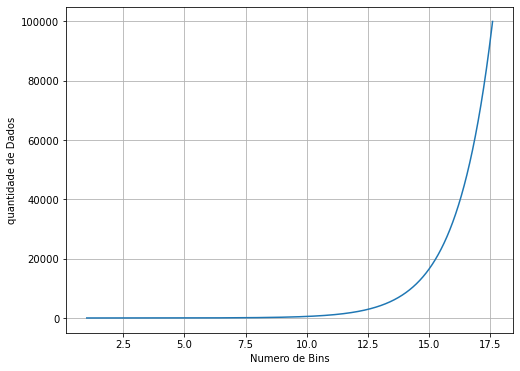

In [60]:
fig = plt.figure(figsize=(8, 6))
plt.plot(Number_of_Bins,n)
plt.xlabel('Numero de Bins')
plt.ylabel('quantidade de Dados')
plt.grid()
plt.show()

> ### Vamos aplicar stratified k-fold cross-validation na prática:
    

In [67]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
    # Cria coluna kfold com -1
    data["kfold"] = 1
    
    # Calcula Número de Bins utilizando regra de Sturger. Vamos usar floor para arredondar os valores
    num_bins = int(np.floor(1 + np.log2(len(data))))
    
    # bin Targets
    data.loc[:,'bins'] = pd.cut(
                                data['targets'], bins = num_bins, labels = False)
    
    
    # Inicializa a classe kfold do model_selection
    kf = model_selection.StratifiedKFold(n_splits = 5)
    
    # Preenche a coluna kfold
    # note que no lugar de targets, iremos usar os bins
    for f, (t_, v_ ) in enumerate(kf.split(X=data, y = data.bins.values)):
        data.loc[v_, 'kfold'] = f
        
    # Deleta a coluna Bins
    data = data.drop('bins', axis = 1)
    
    # retorna o dataframe com os folds
    
    return data

In [72]:
# vamos criar 15000 dados, 100 features e 1 target
X, y = datasets.make_regression(
                                n_samples = 15000,
                                n_features = 1000,
                                n_targets = 1)

# Criar um dataframe
df = pd.DataFrame(X, columns = [f'feature_{i}' for i in range(X.shape[1])])

df.loc[:, 'targets'] = y

df = create_folds(df)
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999,targets,kfold
0,1.221270,-0.534638,-0.208135,0.035767,0.765112,1.186246,1.522513,-0.261441,-0.891212,-0.656054,...,0.117402,-0.183712,-0.230661,0.488696,0.995560,-1.814138,1.249855,1.455666,19.460287,0
1,-0.222295,1.216755,0.683318,0.040857,-1.560009,0.489496,-0.571114,0.814492,-0.991500,-0.232991,...,-0.739795,-0.661157,0.001149,0.719200,-0.085421,-0.535842,-0.299324,-1.519505,-20.352965,0
2,-0.891247,0.057395,2.220964,-0.985127,-0.730061,0.601962,-1.441281,-1.370525,-1.244861,-0.204075,...,0.358034,1.596502,0.174934,0.718622,-1.020755,0.040637,-0.689074,0.140167,-48.610082,0
3,2.920502,-0.452557,-0.189822,-0.133726,-0.183944,0.070585,1.673078,0.731290,-0.793165,-0.533385,...,-0.568846,1.701056,-1.229773,1.172874,-0.654641,-0.397122,0.691996,0.362853,31.513794,0
4,-0.429305,-0.393294,0.078246,1.001205,0.349472,-0.955617,-0.133874,1.521472,0.733738,-0.494503,...,0.639915,-0.530140,-0.032007,0.942059,0.746894,-0.260209,-0.825988,0.887317,55.389470,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-0.002106,-1.151249,-1.130782,-1.962744,0.636868,-1.136193,-2.141191,0.204794,1.430905,0.766017,...,-1.246125,1.161995,-1.008786,-0.448905,0.205836,1.180127,-0.531862,-2.363726,13.141277,4
14996,-1.483762,-0.055477,0.389201,-0.849175,0.063838,-0.320071,-2.538590,0.036953,0.622489,0.771968,...,-0.739632,-0.225200,1.196177,-1.623190,1.118450,0.312163,-2.023163,-0.656284,-352.095007,4
14997,-2.359436,-2.181186,-0.634409,-0.704277,1.071928,1.441112,-0.667220,2.637248,0.998406,-1.145329,...,1.010585,0.853082,-0.309751,-0.754563,0.715426,-0.066950,0.650473,-0.021171,-82.739111,4
14998,-0.267198,-0.733648,-0.187327,0.833502,-0.848166,0.562897,-2.776928,1.037254,1.236238,-0.417491,...,-0.831741,1.517040,-0.137849,0.905673,1.333203,1.657524,-0.218285,3.174166,-114.094199,4


---

Cross-validation é a primeira coisa que devemos fazer quando vamos criar um modelo de machine learning. Se fizermos o cross-validation de forma adequada no qual os dados de validação possuem representatividade dos dados de treino e dados de produção, seremos capazes de gerar bons modelos de machine learning com capacidade significativa de genealizar. 

Os tipos de cross-validation apresentados nesse notebook, podem ser utilizados em quase todos tipos de problemas de machine learning. Importante notar que o tipo de cross-validation adotado deve sempre levar em consideração a natureza dos seus dados e do problema em questão.

For exemplo, vamos supor que a gente queira criar um modelo que indique cancer de pele de acordo com a imagem do paciente. Nesse caso, nossa terefa será criar um modelo com classificação binária que recebe como input a imagem do paciente e preve a probabilidade do cancer ser benigno ou maligno. 

Nesses casos, teremos várias imagens de um mesmo paciente nos dados de treino. Logo, para aplicarmos cross-validation, devemos usar stratified kfold, porém devemos garantir que pacientes dos dados de treinamento não apareçam nos dados de validação. Para esses casos, o scikit-learn oferece um tipo de cross-validation conhecido como **GroupKFold**. Aqui, os paciente podem considerados grupos. Porém, infelizmente não podemos utilizar GroupKFold com StratifiedKFold no scikit-learn. Apesar disso, podemos fazer nós mesmos e aplicar as duas técnicas de associadas e garantir uma melhor performance e generalibilidade do modelo criado.